In [3]:
import numpy           as np
import mujoco_py       as mjPy
import numpy.linalg as la

model_name='2D_model_w_whip'
mj_model  = mjPy.load_model_from_path( './models/' + model_name + ".xml" ) 
mj_data= mjPy.MjSim( mj_model ).data

def get_data_prop( mj_model, mj_data, elem_name: str, name: str, prop_name:str ):
    """
        A method which simplifies the sentence for calling the property in interest
        If executes the following sentence.
            mj_data."elem_name" + "prop_name", 

            [Example] mj_data.body_mass

            name is needed for finding that value. 
    """

    # Saving the method (mth) that we will use. 
    mth = getattr( mj_model, "_".join( [ elem_name, "name2id" ] ) )

    # Returning the value.
    return getattr( mj_data, "_".join( [ elem_name, prop_name ] ) )[  mth( "_".join( [ elem_name, name ]  ) )  ]


def get_length( mj_model, mj_data, elem1_type:str, elem1_name:str, elem2_type:str, elem2_name:str ):
    """
        Get the Euclidean distance between two elements. 

        Arguments
        --------
            [1] elem1_type: "site" or "body" or "geom" etc. 
            [2] elem1_name: name of element 1
            [3] elem2_type: "site" or "body" or "geom" etc. 
            [4] elem2_name: name of element 2

        This function will eventually derive the distance between 
        {elem1_type}_{elem1_name} and {elem2_type}_{elem2_name}.

        The crucial point is that we should use "xpos" rather than "pos", because the former one returns the Cartesian coord. 

        [Example]
            - length_elem2elem( mj_data, "site", "upper_arm_end", "site", "fore_arm_end" )
              returns the distance between "site_upper_arm_end" and "site_fore_arm_end".

    """

    return np.linalg.norm( get_data_prop( mj_model, mj_data, elem1_type, elem1_name, "xpos" ) - get_data_prop( mj_model, mj_data, elem2_type, elem2_name, "xpos" )  , ord = 2  )

#get_length( mj_model, mj_data, "geom", "target", "geom", "whip_node24" )
#mj_data.geom_xpos[-1][:2]=np.random.uniform(low=-0.2, high=0.2, size=2)
la.norm(mj_model.opt.gravity)


9.81

In [15]:
# to calculate the tip2target
from math import sqrt

a=2.28
b=2.385
d=0.5
c=sqrt(a**2+b**2)
e=sqrt(a**2+d**2)
print(e)
#calcualte the target zone

2.3341807984815572


In [18]:
import numpy as np

ori=np.array([2.38,0])
target=np.array([[2.33,0],[2.28,0],[2.23,0],[2.18,0],[2.36,0.1],[2.31,0.1],[2.26,0.1],[2.2,0.1],
                [2.34,0.2],[2.22,0.2],[2.32,0.3],[2.28,0.3],[2.24,0.3],[2.3,0.4],[2.26,0.4],[2.28,0.5],
                [2.35,-0.1],[2.33,-0.3],[2.28,-0.5]])

target[0]-ori

array([-0.05,  0.  ])

In [44]:
# to get a diamond shape 
import numpy as np

x= np.linspace(1.98,2.38,9)
y=np.linspace(-0.4,0.4,9)
print(x,y)
i=len(x)//2
j=len(y)//2
target=[[2.18,0]]
for m in range(0, len(x)):
    for n in range(0, len(y)):
        if abs(i-m)+ abs(j-n)==2 or abs(i-m)+ abs(j-n)==4:
            pos=[x[m], y[n]]
            target.append(pos)
            
print(target, len(target))
print(target[0])
np.random.uniform(low=-0.1, high=0.1, size=2)

[1.98 2.03 2.08 2.13 2.18 2.23 2.28 2.33 2.38] [-0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4]
[[2.18, 0], [1.98, 0.0], [2.03, -0.09999999999999998], [2.03, 0.09999999999999998], [2.08, -0.2], [2.08, 0.0], [2.08, 0.20000000000000007], [2.13, -0.30000000000000004], [2.13, -0.09999999999999998], [2.13, 0.09999999999999998], [2.13, 0.30000000000000004], [2.1799999999999997, -0.4], [2.1799999999999997, -0.2], [2.1799999999999997, 0.20000000000000007], [2.1799999999999997, 0.4], [2.23, -0.30000000000000004], [2.23, -0.09999999999999998], [2.23, 0.09999999999999998], [2.23, 0.30000000000000004], [2.28, -0.2], [2.28, 0.0], [2.28, 0.20000000000000007], [2.33, -0.09999999999999998], [2.33, 0.09999999999999998], [2.38, 0.0]] 25
[2.18, 0]


array([0.00055478, 0.02070097])

Text(0.5, 1.0, 'b_es, b_ee')

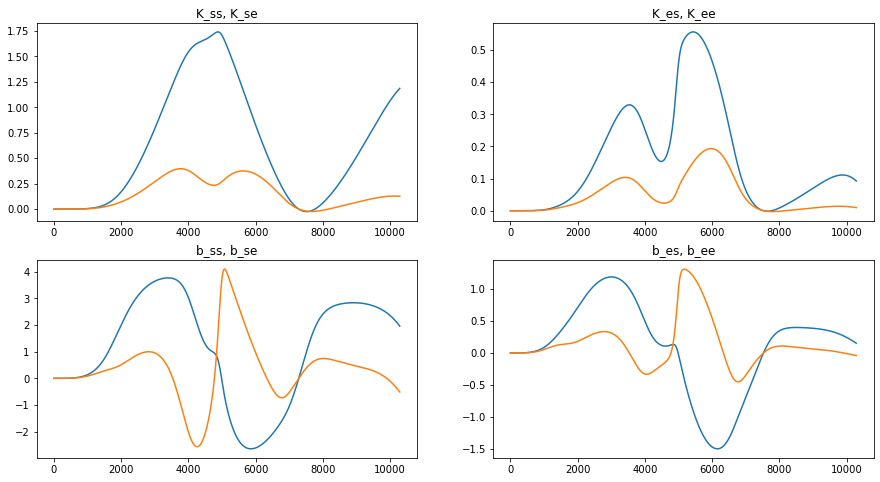

In [8]:
# read npy file track_err with paper version
# # self.Kq= track_err*self.q_err.T/adapt_scale
# # self.Bq= track_err*self.v_err.T/adapt_scale

import numpy as np
import matplotlib.pyplot as plt

mat_k=np.load('tmp_k_opt.npy')
mat_b=np.load('tmp_b_opt.npy')

# mat_b.reshape(11728,4)
k00=mat_k[:,0]
k11=mat_k[:,1]
b00=mat_b[:,0]
b11=mat_b[:,1]


width=15
height=8
fig,axes= plt.subplots(2,2, figsize=(width,height))  
axes[0,0].plot(k00)
axes[0,0].set_title("K_ss, K_se")

axes[0,1].plot(k11)
axes[0,1].set_title("K_es, K_ee")

axes[1,0].plot(b00)
axes[1,0].set_title("b_ss, b_se")

axes[1,1].plot(b11)
axes[1,1].set_title("b_es, b_ee")



Text(0.5, 1.0, 'b_es, b_ee')

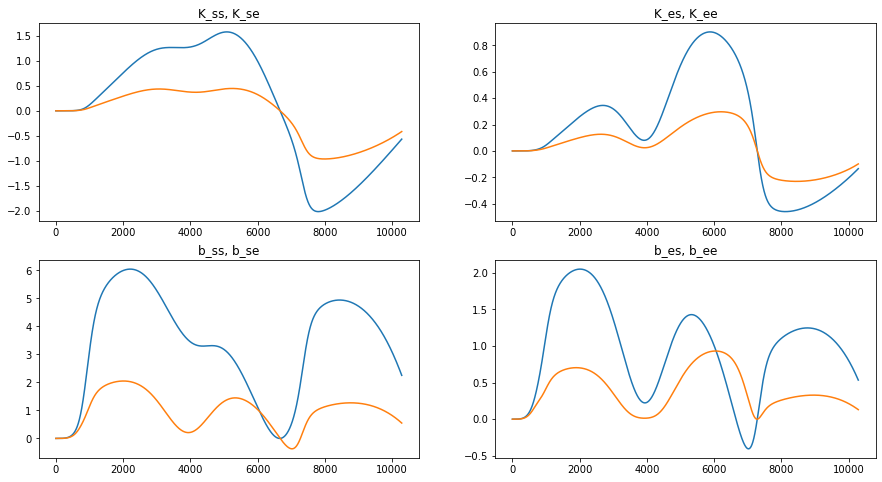

In [7]:
# read npy file track_err with coding version
# # self.Kq= track_err/adapt_scale*self.q_err.T
# # self.Bq= track_err/adapt_scale*self.v_err.T

import numpy as np
import matplotlib.pyplot as plt

mat_k=np.load('tmp_k.npy')
mat_b=np.load('tmp_b.npy')


k00=mat_k[:,0]
k11=mat_k[:,1]
b00=mat_b[:,0]
b11=mat_b[:,1]


width=15
height=8
fig,axes= plt.subplots(2,2, figsize=(width,height))  
axes[0,0].plot(k00)
axes[0,0].set_title("K_ss, K_se")

axes[0,1].plot(k11)
axes[0,1].set_title("K_es, K_ee")

axes[1,0].plot(b00)
axes[1,0].set_title("b_ss, b_se")

axes[1,1].plot(b11)
axes[1,1].set_title("b_es, b_ee")